In [5]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age","workclass","fnlwgt","education","education-num","marital-status",
    "occupation","relationship","race","sex","capital-gain","capital-loss",
    "hours-per-week","native-country","income"
]

df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\\s", engine="python")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


These is an error in transforming " ?" to missing values

In [6]:
# find rows where "?" was not transformed to NaN
df.iloc[25:31][["age", "workclass", "education", "income"]]

,age,workclass,education,income
25,56,Local-gov,Bachelors,>50K
26,19,Private,HS-grad,<=50K
27,54,?,Some-college,>50K
28,39,Private,HS-grad,<=50K
29,49,Private,HS-grad,<=50K
30,23,Local-gov,Assoc-acdm,<=50K


In [7]:
# read the data including a correction for "?"
df = pd.read_csv(url, names=columns, na_values="?", sep=",\s", engine="python")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\adiaz\AppData\Local\Temp\ipykernel_8224\1694155875.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, names=columns, na_values="?", sep=",\s", engine="python")


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# did the fix work?
# find rows where "?" is transformed to NaN
df.iloc[25:31][["age", "workclass", "education", "income"]]

,age,workclass,education,income
25,56,Local-gov,Bachelors,>50K
26,19,Private,HS-grad,<=50K
27,54,NaN,Some-college,>50K
28,39,Private,HS-grad,<=50K
29,49,Private,HS-grad,<=50K
30,23,Local-gov,Assoc-acdm,<=50K


In [9]:
# Get list of column names
columns_list = df.columns.tolist()
columns_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [10]:
# find data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

# Step 1. Handling Missing Values
Identify which columns contain missing values.
Decide: should you drop rows/columns, or impute (fill in) the values?
If imputing, what strategy makes sense for numeric vs categorical features?

In [11]:
# Check missing nan values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [12]:
# find the proportion of missing values in each column
df.isna().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
income            0.000000
dtype: float64

Since the missing values in workclass and occupation account for les than 6% we will replace them with the mode fo rthe sake of simplification.

In [13]:
# find rows in df with only missing values
df[df.isnull().all(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
# handle missing values in categorical columns by replacing them with the mode
cat_cols = df.select_dtypes(include=['object']).copy().columns.tolist()
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [31]:
# Verify no missing values remain
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

An alternative to handle categorical missing values would be to fill the missing values with a string like "N/A"

# Step 2. Handling Outliers
Explore the numeric features.
Use summary statistics and visualizations (e.g., histograms, boxplots) to detect extreme values.
Apply the IQR method or another method to set thresholds.
Decide: remove, cap, or transform outliers.

In [15]:
# Numeric columns in the dataset
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# 1. Summary statistics
df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


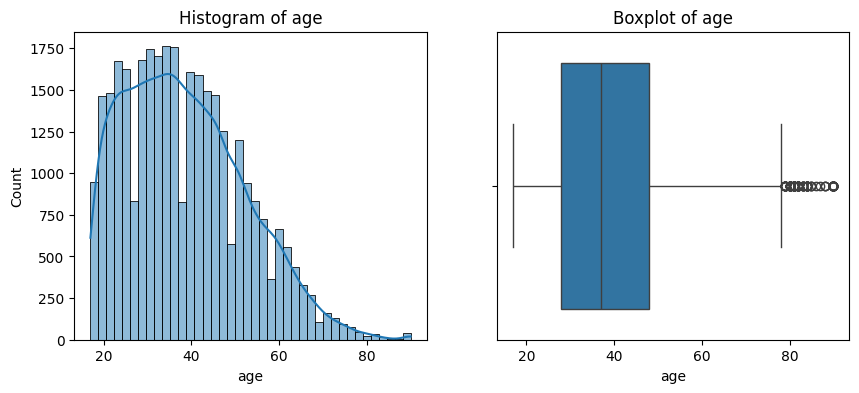

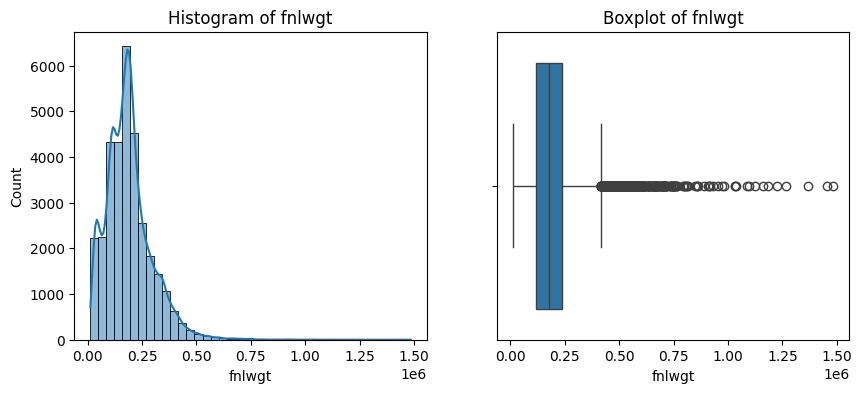

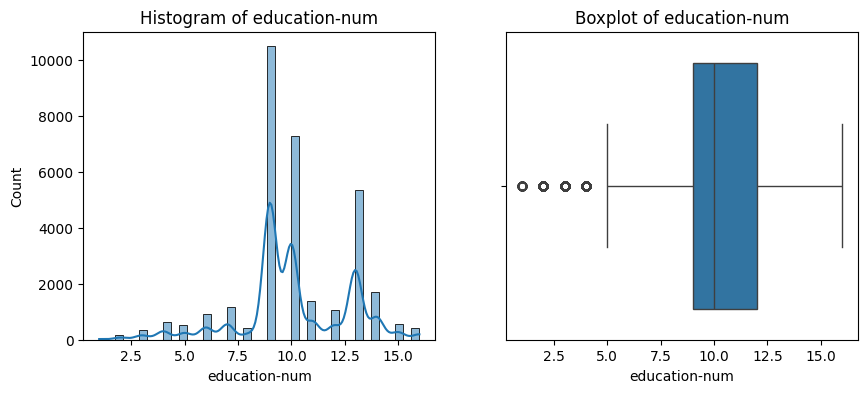

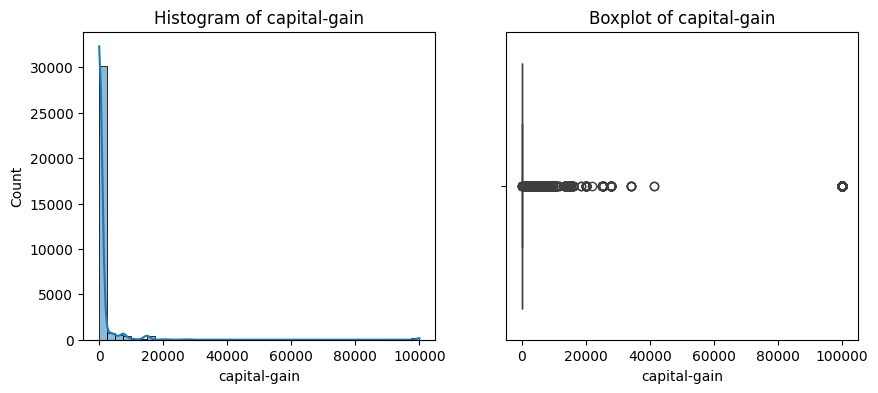

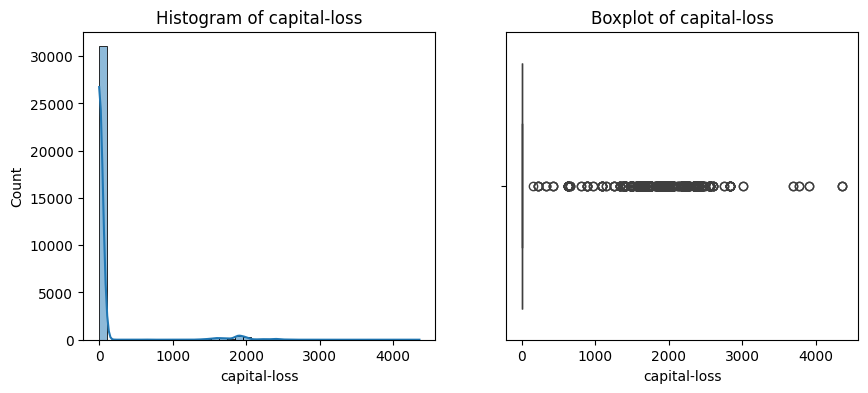

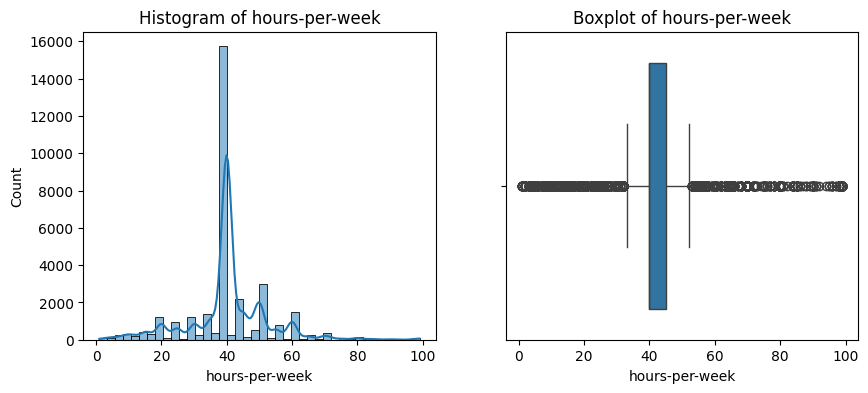

In [18]:
# 2. Visualize distributions

import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

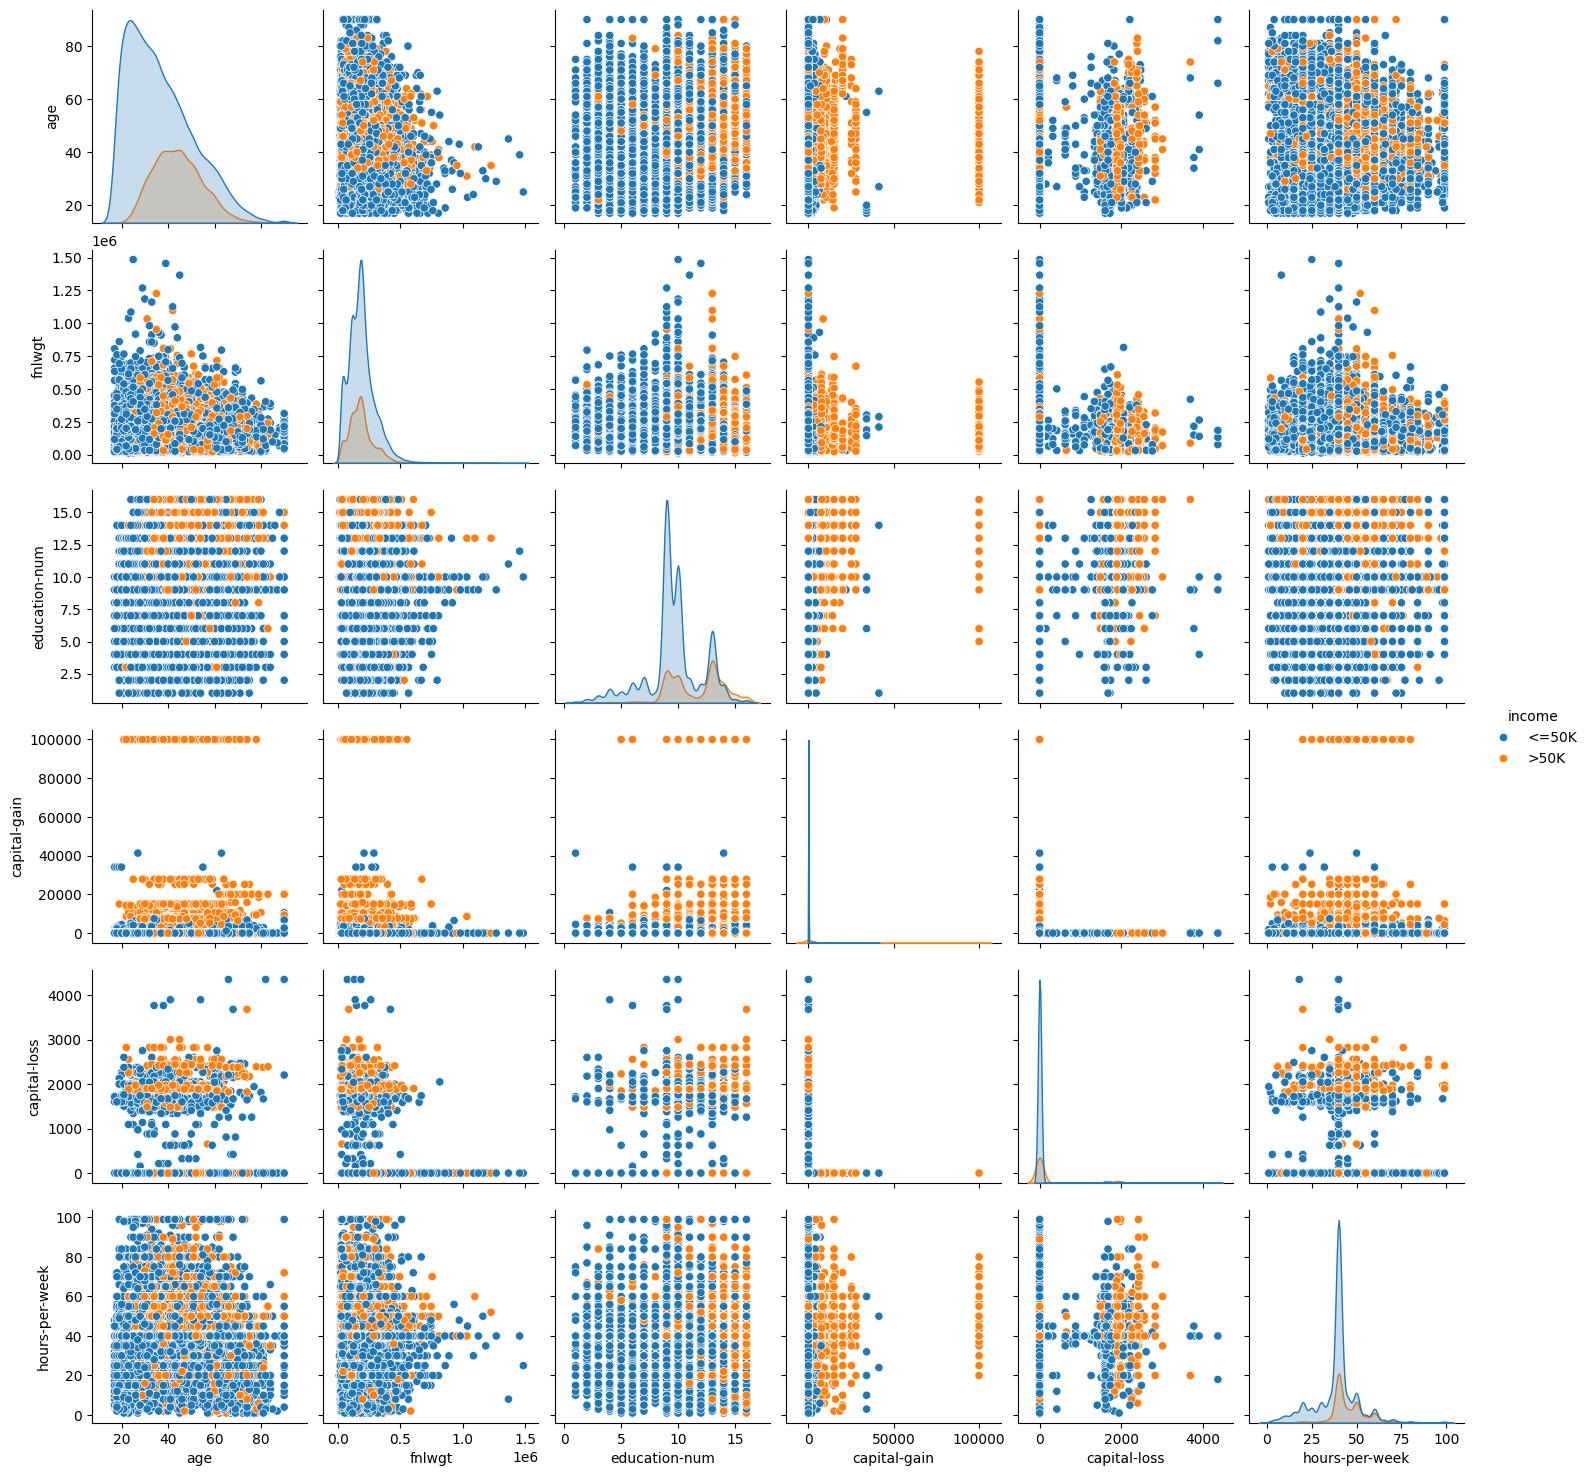

In [20]:
# Pairplot for all numeric columns and see how income affects the distributions
sns.pairplot(df, hue="income", vars=num_cols)
#sns.pairplot(df[num_cols + ["income"]], hue="income", palette="Set1")
plt.show()

In [21]:
# 3. Detect outliers with IQR
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: lower={lower_bound}, upper={upper_bound}, outliers={outliers[col]}")

age: lower=-2.0, upper=78.0, outliers=143
fnlwgt: lower=-61009.0, upper=415887.0, outliers=992
education-num: lower=4.5, upper=16.5, outliers=1198
capital-gain: lower=0.0, upper=0.0, outliers=2712
capital-loss: lower=0.0, upper=0.0, outliers=1519
hours-per-week: lower=32.5, upper=52.5, outliers=9008


I'll do the analysis specifically for capital-gain, capital-loss, and hours-per-week (the most skewed features), and show the before/after effect of capping vs. removing outliers

In [ ]:
import numpy as np

# Copy dataframe for transformation
df_log = df.copy()

# Apply log1p (log(1+x)) to handle zeros safely
log_features = ["capital-gain", "capital-loss", "hours-per-week"]
for col in log_features:
    df_log[col] = np.log1p(df_log[col])

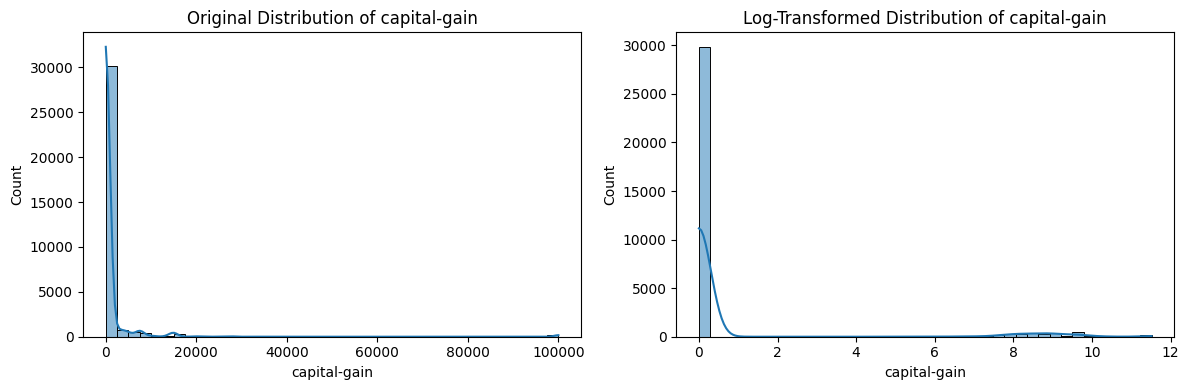

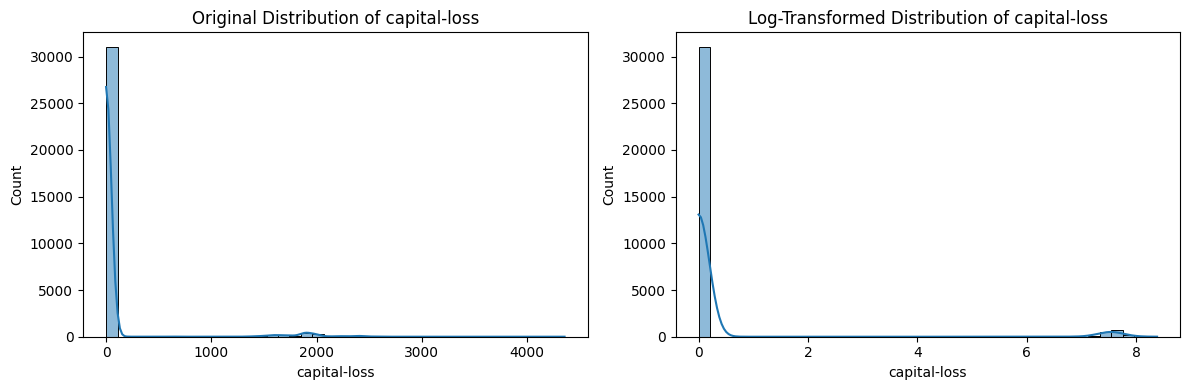

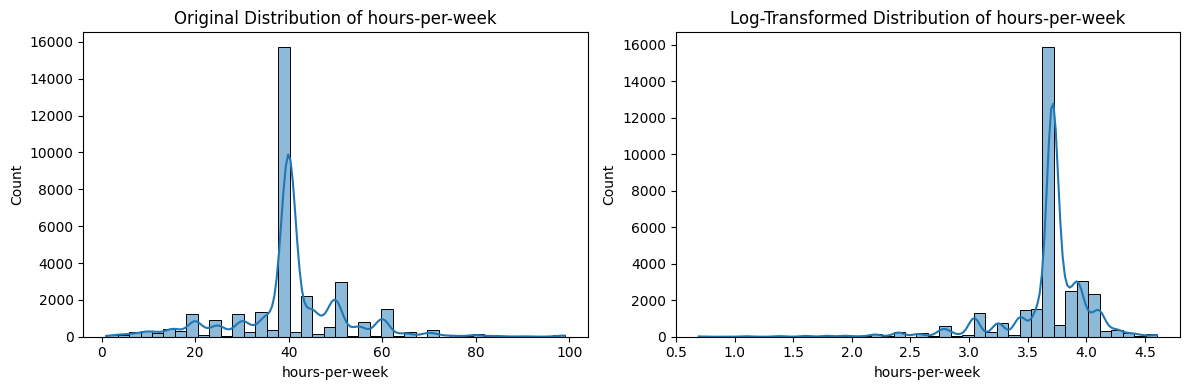

In [24]:
# Compare original vs log-transformed distributions
for col in log_features:
    plt.figure(figsize=(12,4))
    
    # Original
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Original Distribution of {col}")
    
    # Log-transformed
    plt.subplot(1,2,2)
    sns.histplot(df_log[col], kde=True, bins=40)
    plt.title(f"Log-Transformed Distribution of {col}")
    
    plt.tight_layout()
    plt.show()

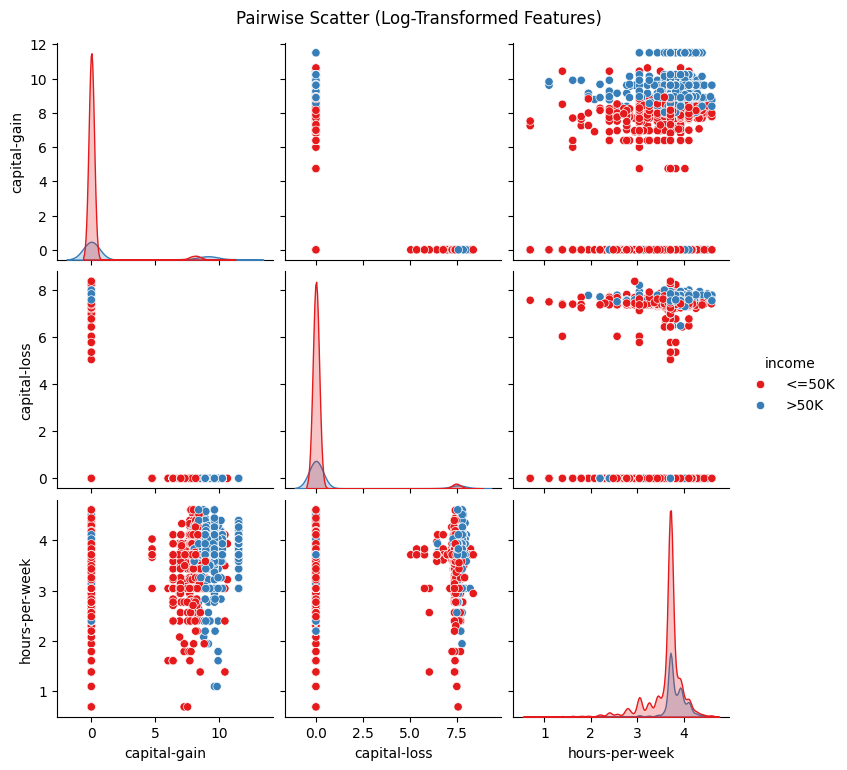

In [25]:
# Pairplot after log-transform (to check relationships)
sns.pairplot(df_log[["capital-gain","capital-loss","hours-per-week","income"]], 
             hue="income", palette="Set1")
plt.suptitle("Pairwise Scatter (Log-Transformed Features)", y=1.02)
plt.show()

# Step 3. Handling Categorical Data
Find all the categorical features in the dataset.
Convert them into numeric form so they can be used in models.
Try both pd.get_dummies() and OneHotEncoder.
Reflect: which method would you use in production, and why?

I'll continue working with the log_transform df_log

In [34]:
df = df_log.copy()

In [35]:
print("Categorical features:", list(cat_cols))

Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Since the target variable is not included in the categorical features there's no need to exlude it

In [ ]:
# One-hot encoding with pandas
df_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)

'''
Expands each categorical feature into multiple binary columns.
drop_first=True avoids the dummy variable trap (collinearity).
'''

print("Shape after get_dummies:", df_dummies.shape)
df_dummies.head()

Shape after get_dummies: (32561, 98)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,7.684784,0.0,3.713572,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0.000000,0.0,2.639057,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0.000000,0.0,3.713572,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0.000000,0.0,3.713572,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0.000000,0.0,3.713572,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
from sklearn.preprocessing import OneHotEncoder

# create dataframe with categorical features only
df_cat = df[cat_cols]

# Initialize encoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit and transform
cat_encoded = encoder.fit_transform(df_cat)

# Create dataframe with encoded columns
encoded_cols = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(cat_encoded, columns=encoded_cols)
df_cat_encoded.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate back with original dataframe
df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), df_cat_encoded.reset_index(drop=True)], axis=1)

Reflection: Which to use in production?

pd.get_dummies()

(+) Easy, fast, works directly on Pandas DataFrames
(-) Not robust for production pipelines, because column mismatch can happen if new categories appear in unseen data.

OneHotEncoder

(+)Handles unseen categories (handle_unknown="ignore")(+)
(+)Fits naturally into sklearn Pipelines (scaling, encoding, modeling)(+)
(+)Ensures consistent preprocessing during training & prediction.
(-) Slightly more code than pd.get_dummies().

In production: I would prefer OneHotEncoder inside a pipeline, because it’s robust, scalable, and avoids mismatched columns between training and inference.

# Step 4. Feature Scaling
Pick several numeric features.
Apply different scaling methods (Min-Max, Standardization).
Compare before and after.
Which method do you think is most appropriate here?